In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fusion-of-biosignals/Table 2.docx
/kaggle/input/fusion-of-biosignals/Table 4.docx
/kaggle/input/fusion-of-biosignals/Table 6.docx
/kaggle/input/fusion-of-biosignals/Table 1.docx
/kaggle/input/fusion-of-biosignals/Table 5.docx
/kaggle/input/fusion-of-biosignals/Table 3.docx
/kaggle/input/fusion-of-biosignals/Pseudo codes.docx
/kaggle/input/fusion-of-biosignals/Table 7.docx


Fusion of Biosignals (ECG + EMG + SpO₂) for Personalized Diagnosis – Dataset Analysis

Περιγραφή :
Η εργασία επικεντρώνεται στη συγχώνευση βιοσημάτων όπως το ηλεκτροκαρδιογράφημα (ECG), το ηλεκτρομυογράφημα (EMG) και τον κορεσμό οξυγόνου στο αίμα (SpO₂), με στόχο την ανάπτυξη ενός εξατομικευμένου διαγνωστικού μοντέλου. Χρησιμοποιώντας τα παραπάνω datasets, μπορούν να εφαρμοστούν τεχνικές προεπεξεργασίας, εξαγωγής χαρακτηριστικών και μηχανικής μάθησης για την ταξινόμηση ή πρόβλεψη παθολογικών καταστάσεων.

Βασικά Βήματα:

Συλλογή και κατανόηση των δεδομένων από τα επιλεγμένα datasets.

Καθαρισμός και ευθυγράμμιση των σημάτων ECG, EMG και SpO₂.

Εξαγωγή και συγχώνευση χαρακτηριστικών (feature fusion).

Ανάπτυξη μοντέλων μηχανικής μάθησης (π.χ. Random Forest, SVM, ή Deep Learning).

Αξιολόγηση μοντέλων με μετρικές όπως Accuracy, Precision, Recall, F1-score.

Συμπεράσματα για την αξία της πολυτροπικής προσέγγισης στην εξατομικευμένη διάγνωση.

In [2]:
pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
from docx import Document
import os

# Λίστα με όλα τα αρχεία προς ανάγνωση
filenames = [
    "Table 1.docx", "Table 2.docx", "Table 3.docx",
    "Table 4.docx", "Table 5.docx", "Table 6.docx", "Table 7.docx",
    "Pseudo codes.docx"
]

# Βασικό μονοπάτι στον φάκελο του dataset
base_path = "/kaggle/input/fusion-of-biosignals/"

# Συνάρτηση για ανάγνωση περιεχομένου από .docx αρχείο
def read_docx(file_path):
    doc = Document(file_path)
    full_text = []
    for para in doc.paragraphs:
        full_text.append(para.text)
    return '\n'.join(full_text)

# Φόρτωση και εκτύπωση των περιεχομένων κάθε αρχείου
for fname in filenames:
    path = os.path.join(base_path, fname)
    content = read_docx(path)
    print(f"===== {fname} =====")
    print(content[:1000])  # Εμφανίζει τα πρώτα 1000 χαρακτήρες για προεπισκόπηση
    print("\n\n")


===== Table 1.docx =====

Table 1 ECG databases and records that used in simulating algorithms


Fig.1 ECG Sample dataset for record a01 [1].





===== Table 2.docx =====

Table 2  SpO2 database and records that used in simulating algorithms



Fig.2 SpO2 Sample dataset for record 032n [1].






===== Table 3.docx =====
Table 3 Blood Pressure database and records that used in simulating algorithms
dataset for record 032n.


Fig.3 Blood pressure sample dataset for record 032n [1].





===== Table 4.docx =====
Our machine learning algorithms were simulated and implemented on the databases and signal records presented in [1], to extract the medical features that are important for healthcare research studies. The outcome of our algorithms is considered the numeric values that presented in Table 4 as numeric values.  
Table 4 Vital Features related to blood Pressure diseases extracted based on our simulating algorithms 
(* x means not addressed)


Blood pressure (Bp) and Spo2 data have d

In [4]:
from docx import Document
import pandas as pd
import os

# Λίστα με τα αρχεία .docx
filenames = [
    "Table 1.docx", "Table 2.docx", "Table 3.docx",
    "Table 4.docx", "Table 5.docx", "Table 6.docx", "Table 7.docx"
]

# Διαδρομή στο φάκελο των αρχείων
base_path = "/kaggle/input/fusion-of-biosignals/"

# Λίστα για αποθήκευση των πινάκων
tables = {}

# Διαβάζουμε κάθε έγγραφο και εξάγουμε πίνακες
for fname in filenames:
    path = os.path.join(base_path, fname)
    doc = Document(path)

    for i, table in enumerate(doc.tables):
        data = []
        for row in table.rows:
            row_data = [cell.text.strip() for cell in row.cells]
            data.append(row_data)
        
        # Δημιουργία DataFrame
        df = pd.DataFrame(data)
        
        # Αν έχει κεφαλίδες, χρησιμοποιούμε την πρώτη γραμμή ως header
        if len(df) > 1:
            df.columns = df.iloc[0]
            df = df.drop(df.index[0]).reset_index(drop=True)
        
        # Αποθήκευση με αναγνωριστικό
        table_key = f"{fname.replace('.docx', '')}_Table_{i+1}"
        tables[table_key] = df

# Εμφάνιση παραδείγματος από έναν πίνακα
for name, df in tables.items():
    print(f"\n===== {name} =====")
    print(df.head())
    break  # Αφαιρέστε αυτό το break για να δείτε όλους



===== Table 1_Table_1 =====
0                             Database  \
0      Apnea-ECG data base (apnea-ecg)   
1      Apnea-ECG data base (apnea-ecg)   
2      Apnea-ECG data base (apnea-ecg)   
3      Apnea-ECG data base (apnea-ecg)   
4  MIT-BIH Arrhythmia database (mitdb)   

0                                    Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

0                                    Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

0                                 Record Des

In [5]:
for name, df in tables.items():
    df.to_csv(f"/kaggle/working/{name}.csv", index=False)


In [6]:
# Λεξικό με συγκεκριμένα ονόματα αρχείων εξόδου
export_names = {
    "Table 1.docx": "ecg_features.csv",
    "Table 2.docx": "emg_features.csv",
    "Table 3.docx": "spo2_features.csv",
    "Table 4.docx": "ecg_results.csv",
    "Table 5.docx": "emg_results.csv",
    "Table 6.docx": "spo2_results.csv",
    "Table 7.docx": "fused_results.csv"
}

# Εξαγωγή μόνο του πρώτου πίνακα από κάθε .docx (αν έχει περισσότερους μπορείς να τους χειριστείς ξεχωριστά)
for fname in filenames:
    path = os.path.join(base_path, fname)
    doc = Document(path)
    if len(doc.tables) > 0:
        table = doc.tables[0]
        data = []
        for row in table.rows:
            data.append([cell.text.strip() for cell in row.cells])
        df = pd.DataFrame(data)
        
        # Αν έχει headers
        if len(df) > 1:
            df.columns = df.iloc[0]
            df = df.drop(df.index[0]).reset_index(drop=True)
        
        # Εξαγωγή με συγκεκριμένο όνομα
        output_name = export_names.get(fname, fname.replace('.docx', '') + ".csv")
        df.to_csv(f"/kaggle/working/{output_name}", index=False)


In [7]:
import pandas as pd

df = pd.read_csv("/kaggle/working/ecg_features.csv")
print(df.head())


                              Database  \
0      Apnea-ECG data base (apnea-ecg)   
1      Apnea-ECG data base (apnea-ecg)   
2      Apnea-ECG data base (apnea-ecg)   
3      Apnea-ECG data base (apnea-ecg)   
4  MIT-BIH Arrhythmia database (mitdb)   

                                     Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                   Record (Signal).1  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                  Record Description  
0  Male.\nAge: 51.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Database            35 non-null     object
 1   Record (Signal)     35 non-null     object
 2   Record (Signal).1   35 non-null     object
 3   Record Description  35 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [10]:
df.columns

Index(['Database', 'Record (Signal)', 'Record (Signal).1',
       'Record Description'],
      dtype='object')

In [11]:
base_path = "/kaggle/input/fusion-of-biosignals/"
output_path = "/kaggle/working/"

created_files = []

# Ανάγνωση όλων των αρχείων
for fname in filenames:
    path = os.path.join(base_path, fname)
    doc = Document(path)
    
    for i, table in enumerate(doc.tables):
        data = []
        for row in table.rows:
            data.append([cell.text.strip() for cell in row.cells])
        df = pd.DataFrame(data)

        # Αν έχει headers
        if len(df) > 1:
            df.columns = df.iloc[0]
            df = df.drop(df.index[0]).reset_index(drop=True)
        
        # Δημιουργία ονόματος αρχείου
        base_name = export_names.get(fname, fname.replace('.docx', ''))
        output_name = f"{base_name}_part{i+1}.csv"
        output_file = os.path.join(output_path, output_name)

        df.to_csv(output_file, index=False)
        created_files.append(output_name)

# Εμφάνιση των αρχείων που δημιουργήθηκαν
print("✅ Τα παρακάτω CSV αρχεία δημιουργήθηκαν:\n")
for f in created_files:
    print(f"• {f}")

✅ Τα παρακάτω CSV αρχεία δημιουργήθηκαν:

• ecg_features.csv_part1.csv
• emg_features.csv_part1.csv
• spo2_features.csv_part1.csv
• ecg_results.csv_part1.csv
• emg_results.csv_part1.csv
• spo2_results.csv_part1.csv
• fused_results.csv_part1.csv


In [12]:
import pandas as pd

# Λίστα αρχείων προς ανάλυση
filenames = [
    "ecg_features.csv_part1.csv",
    "emg_features.csv_part1.csv",
    "spo2_features.csv_part1.csv",
    "ecg_results.csv_part1.csv",
    "emg_results.csv_part1.csv",
    "spo2_results.csv_part1.csv",
    "fused_results.csv_part1.csv"
]

base_path = "/kaggle/working/"

# Ανάλυση κάθε αρχείου
for fname in filenames:
    print(f"\n===== 📁 {fname} =====")
    path = base_path + fname
    df = pd.read_csv(path)

    print(f"\n🔹 Shape: {df.shape}")
    print(f"\n🔹 Columns: {df.columns.tolist()}")
    
    print("\n🔹 Head:")
    print(df.head())

    print("\n🔹 Info:")
    print(df.info())

    print("\n🔹 Describe:")
    print(df.describe(include='all'))

    print("\n" + "-"*80 + "\n")



===== 📁 ecg_features.csv_part1.csv =====

🔹 Shape: (35, 4)

🔹 Columns: ['Database', 'Record (Signal)', 'Record (Signal).1', 'Record Description']

🔹 Head:
                              Database  \
0      Apnea-ECG data base (apnea-ecg)   
1      Apnea-ECG data base (apnea-ecg)   
2      Apnea-ECG data base (apnea-ecg)   
3      Apnea-ECG data base (apnea-ecg)   
4  MIT-BIH Arrhythmia database (mitdb)   

                                     Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                   Record (Signal).1  \
0                                                a01   
1                                                a03   
2                                                b01   
3                             

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

In [13]:
import pandas as pd

# Φορτώνουμε τα χαρακτηριστικά
ecg = pd.read_csv("/kaggle/working/ecg_features.csv_part1.csv")
emg = pd.read_csv("/kaggle/working/emg_features.csv_part1.csv")
spo2 = pd.read_csv("/kaggle/working/spo2_features.csv_part1.csv")

# Ετικέτες (target values)
labels = pd.read_csv("/kaggle/working/fused_results.csv_part1.csv")

# Προαιρετικό: Δες τα σχήματα για έλεγχο
print("Shapes:\n")
print("ECG:", ecg.shape)
print("EMG:", emg.shape)
print("SpO2:", spo2.shape)
print("Labels:", labels.shape)

# Επαναφορά index αν χρειάζεται
ecg.reset_index(drop=True, inplace=True)
emg.reset_index(drop=True, inplace=True)
spo2.reset_index(drop=True, inplace=True)
labels.reset_index(drop=True, inplace=True)

# Συνένωση χαρακτηριστικών κατά γραμμή (axis=1)
features = pd.concat([ecg, emg, spo2], axis=1)

# Τελικός πίνακας με χαρακτηριστικά + ετικέτες
merged_df = pd.concat([features, labels], axis=1)

# Εμφάνιση
print("\n✅ Τελικό merged_df:")
print(merged_df.head())
print("\n🔍 Shape:", merged_df.shape)

# Αποθήκευση στο /working για έλεγχο
merged_df.to_csv("/kaggle/working/merged_dataset.csv", index=False)
print("\n📁 Το αρχείο merged_dataset.csv δημιουργήθηκε.")


Shapes:

ECG: (35, 4)
EMG: (1, 3)
SpO2: (1, 3)
Labels: (10, 18)

✅ Τελικό merged_df:
                              Database  \
0      Apnea-ECG data base (apnea-ecg)   
1      Apnea-ECG data base (apnea-ecg)   
2      Apnea-ECG data base (apnea-ecg)   
3      Apnea-ECG data base (apnea-ecg)   
4  MIT-BIH Arrhythmia database (mitdb)   

                                     Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                   Record (Signal).1  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a mod

In [14]:
import pandas as pd

# Φορτώνουμε τα χαρακτηριστικά
ecg = pd.read_csv("/kaggle/working/ecg_features.csv_part1.csv")
emg = pd.read_csv("/kaggle/working/emg_features.csv_part1.csv")
spo2 = pd.read_csv("/kaggle/working/spo2_features.csv_part1.csv")

# Ετικέτες (target values)
labels = pd.read_csv("/kaggle/working/fused_results.csv_part1.csv")

# Επαναφορά index αν χρειάζεται
ecg.reset_index(drop=True, inplace=True)
emg.reset_index(drop=True, inplace=True)
spo2.reset_index(drop=True, inplace=True)
labels.reset_index(drop=True, inplace=True)

# Συνένωση χαρακτηριστικών κατά γραμμή (axis=1)
features = pd.concat([ecg, emg, spo2], axis=1)

# Τελικός πίνακας με χαρακτηριστικά + ετικέτες
merged_df = pd.concat([features, labels], axis=1)

# Εμφάνιση πρώτων γραμμών
print("\n✅ Τελικό merged_df:")
print(merged_df.head())



✅ Τελικό merged_df:
                              Database  \
0      Apnea-ECG data base (apnea-ecg)   
1      Apnea-ECG data base (apnea-ecg)   
2      Apnea-ECG data base (apnea-ecg)   
3      Apnea-ECG data base (apnea-ecg)   
4  MIT-BIH Arrhythmia database (mitdb)   

                                     Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                   Record (Signal).1  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                  Record Description

In [18]:
# Ανάλυση της πρώτης εμφάνισης του dataset με τις ετικέτες
print("\n🔹 Στήλες του dataset με τις ετικέτες:")
print(labels.columns)

# Εμφάνιση των πρώτων 5 γραμμών για να καταλάβουμε τη δομή
print("\n🔹 Πρώτες 5 γραμμές του dataset με τις ετικέτες:")
print(labels.head())



🔹 Στήλες του dataset με τις ετικέτες:
Index(['Patient Alias Name', 'ECG\nrecord name', 'spo2 record',
       'Blood Pressure record (High)', 'Blood Pressure record (Low)',
       'Patient index in MSHA simulation', 'Spo2 value',
       'High Blood Pressure value (mHg)', 'Low Blood Pressure value (mHg)',
       'Location', 'Chest Pain', 'Shortness of Breath.', 'Palpitations',
       'rest?', 'ECG Number of Peaks', 'QRS width', 'P-P Interval',
       'ST Elevation'],
      dtype='object')

🔹 Πρώτες 5 γραμμές του dataset με τις ετικέτες:
  Patient Alias Name ECG\nrecord name spo2 record  \
0         Mrs. smith              a01        259n   
1               Ross              105        052n   
2             Monica              103       0481n   
3               Joey              105        210n   
4              Sally              107        217n   

  Blood Pressure record (High) Blood Pressure record (Low)  \
0                         032n                        209n   
1              

In [23]:
# Αντί να χρησιμοποιούμε τη στήλη 'Diagnosis', χρησιμοποιούμε τη στήλη 'Chest Pain'
print("\n🔹 Ετικέτες (Labels):")
print(labels.head())

# Αν η στήλη με τις ετικέτες έχει συγκεκριμένο όνομα, ας την αναγνωρίσουμε
# Αν π.χ. είναι "Chest Pain"
print("\n🔹 Value counts για τις ετικέτες:")
print(labels['Chest Pain'].value_counts())



🔹 Ετικέτες (Labels):
  Patient Alias Name ECG\nrecord name spo2 record  \
0         Mrs. smith              a01        259n   
1               Ross              105        052n   
2             Monica              103       0481n   
3               Joey              105        210n   
4              Sally              107        217n   

  Blood Pressure record (High) Blood Pressure record (Low)  \
0                         032n                        209n   
1                         048n                        414n   
2                         032n                        209n   
3                         048n                         33n   
4                         032n                        209n   

   Patient index in MSHA simulation  Spo2 value  \
0                               144          80   
1                               363          97   
2                               160          97   
3                               342          92   
4                              

In [16]:
# Έλεγχος για κενά δεδομένα (null values)
print("\n🔹 Κενά δεδομένα (Missing Values):")
print(merged_df.isna().sum())

# Στατιστικά περιγραφή
print("\n🔹 Στατιστική Περιγραφή:")
print(merged_df.describe(include='all'))

# Έλεγχος για διπλότυπες γραμμές
print("\n🔹 Διπλότυπες γραμμές:")
print(merged_df.duplicated().sum())

# Αν υπάρχουν διπλότυπα, μπορούμε να τα αφαιρέσουμε:
merged_df = merged_df.drop_duplicates()



🔹 Κενά δεδομένα (Missing Values):
Database                             0
Record (Signal)                      0
Record (Signal).1                    0
Record Description                   0
Database                            34
Records                             34
Descriptions for all the records    34
Database                            34
Records                             34
Descriptions for all the records    34
Patient Alias Name                  25
ECG\nrecord name                    25
spo2 record                         25
Blood Pressure record (High)        25
Blood Pressure record (Low)         25
Patient index in MSHA simulation    25
Spo2 value                          25
High Blood Pressure value (mHg)     25
Low Blood Pressure value (mHg)      25
Location                            25
Chest Pain                          25
Shortness of Breath.                25
Palpitations                        25
rest?                               25
ECG Number of Peaks          

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [27]:
import pandas as pd

# Φόρτωση του αρχείου CSV
merged_df = pd.read_csv('merged_dataset.csv')

# Προβολή των πρώτων 5 γραμμών του merged_df
print(merged_df.head())

# Έλεγχος του σχήματος του dataset
print("\n🔹 Σχήμα του dataset:", merged_df.shape)


                              Database  \
0      Apnea-ECG data base (apnea-ecg)   
1      Apnea-ECG data base (apnea-ecg)   
2      Apnea-ECG data base (apnea-ecg)   
3      Apnea-ECG data base (apnea-ecg)   
4  MIT-BIH Arrhythmia database (mitdb)   

                                     Record (Signal)  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                   Record (Signal).1  \
0                                                a01   
1                                                a03   
2                                                b01   
3                                                x15   
4  In most records, the upper signal is a modifie...   

                                  Record Description               Databa

In [28]:
# Αφαίρεση στήλες που δεν είναι χρήσιμες για την εκπαίδευση
merged_df_cleaned = merged_df.drop(columns=['Database', 'Record (Signal)', 'Record (Signal).1', 
                                            'Record Description', 'Database.1', 'Records', 
                                            'Descriptions for all the records', 'Database.2', 
                                            'Records.1', 'Descriptions for all the records.1'])

# Αντικατάσταση τιμών 'true'/'false' με 1 και 0 αντίστοιχα (για εύκολη εκπαίδευση του μοντέλου)
merged_df_cleaned = merged_df_cleaned.replace({'true': 1, 'false': 0})

# Αφαίρεση γραμμών με missing τιμές (αν υπάρχουν)
merged_df_cleaned = merged_df_cleaned.dropna()

# Δείτε τις πρώτες γραμμές μετά τον καθαρισμό
print(merged_df_cleaned.head())


  Patient Alias Name ECG\nrecord name spo2 record  \
0         Mrs. smith              a01        259n   
1               Ross              105        052n   
2             Monica              103       0481n   
3               Joey              105        210n   
4              Sally              107        217n   

  Blood Pressure record (High) Blood Pressure record (Low)  \
0                         032n                        209n   
1                         048n                        414n   
2                         032n                        209n   
3                         048n                         33n   
4                         032n                        209n   

   Patient index in MSHA simulation  Spo2 value  \
0                             144.0        80.0   
1                             363.0        97.0   
2                             160.0        97.0   
3                             342.0        92.0   
4                             436.0        97.0   

 

In [30]:
# Ελέγχουμε ποιες στήλες περιέχουν τύπο δεδομένων object (δηλαδή strings)
categorical_columns = merged_df_cleaned.select_dtypes(include=['object']).columns
print("\nΚατηγορικές στήλες: ", categorical_columns)



Κατηγορικές στήλες:  Index(['Patient Alias Name', 'ECG\nrecord name', 'spo2 record',
       'Blood Pressure record (High)', 'Blood Pressure record (Low)',
       'Location', 'Chest Pain', 'Shortness of Breath.', 'Palpitations',
       'rest?', 'ECG Number of Peaks', 'QRS width', 'P-P Interval',
       'ST Elevation'],
      dtype='object')


In [31]:
from sklearn.preprocessing import LabelEncoder

# Δημιουργία ενός LabelEncoder
label_encoder = LabelEncoder()

# Εφαρμογή Label Encoding σε κάθε κατηγορική στήλη
for col in categorical_columns:
    merged_df_cleaned[col] = label_encoder.fit_transform(merged_df_cleaned[col].astype(str))

# Ελέγχουμε τα αποτελέσματα
print("\nΠρώτες γραμμές μετά το Label Encoding:\n", merged_df_cleaned.head())



Πρώτες γραμμές μετά το Label Encoding:
    Patient Alias Name  ECG\nrecord name  spo2 record  \
0                   4                 3            6   
1                   7                 1            2   
2                   3                 0            0   
3                   2                 1            4   
4                   8                 2            5   

   Blood Pressure record (High)  Blood Pressure record (Low)  \
0                             0                            0   
1                             1                            3   
2                             0                            0   
3                             1                            2   
4                             0                            0   

   Patient index in MSHA simulation  Spo2 value  \
0                             144.0        80.0   
1                             363.0        97.0   
2                             160.0        97.0   
3                             342

In [32]:
# Χρησιμοποιούμε pd.get_dummies για One Hot Encoding
merged_df_cleaned = pd.get_dummies(merged_df_cleaned, columns=categorical_columns)

# Ελέγχουμε τα αποτελέσματα
print("\nΠρώτες γραμμές μετά το One Hot Encoding:\n", merged_df_cleaned.head())



Πρώτες γραμμές μετά το One Hot Encoding:
    Patient index in MSHA simulation  Spo2 value  \
0                             144.0        80.0   
1                             363.0        97.0   
2                             160.0        97.0   
3                             342.0        92.0   
4                             436.0        97.0   

   High Blood Pressure value (mHg)  Low Blood Pressure value (mHg)  \
0                             23.0                            12.0   
1                             12.0                             8.0   
2                             23.0                            12.0   
3                             15.0                            10.0   
4                             23.0                            12.0   

   Patient Alias Name_0  Patient Alias Name_1  Patient Alias Name_2  \
0                 False                 False                 False   
1                 False                 False                 False   
2               

In [36]:
# Εκτυπώνουμε τα ονόματα των στηλών
print(merged_df_cleaned.columns)



Index(['Patient index in MSHA simulation', 'Spo2 value',
       'High Blood Pressure value (mHg)', 'Low Blood Pressure value (mHg)',
       'Patient Alias Name_0', 'Patient Alias Name_1', 'Patient Alias Name_2',
       'Patient Alias Name_3', 'Patient Alias Name_4', 'Patient Alias Name_5',
       'Patient Alias Name_6', 'Patient Alias Name_7', 'Patient Alias Name_8',
       'Patient Alias Name_9', 'ECG\nrecord name_0', 'ECG\nrecord name_1',
       'ECG\nrecord name_2', 'ECG\nrecord name_3', 'ECG\nrecord name_4',
       'spo2 record_0', 'spo2 record_1', 'spo2 record_2', 'spo2 record_3',
       'spo2 record_4', 'spo2 record_5', 'spo2 record_6',
       'Blood Pressure record (High)_0', 'Blood Pressure record (High)_1',
       'Blood Pressure record (High)_2', 'Blood Pressure record (Low)_0',
       'Blood Pressure record (Low)_1', 'Blood Pressure record (Low)_2',
       'Blood Pressure record (Low)_3', 'Location_0', 'Chest Pain_0',
       'Chest Pain_1', 'Chest Pain_2', 'Shortness of Brea

In [37]:
# Καθαρισμός κενών και ειδικών χαρακτήρων στα ονόματα των στηλών
merged_df_cleaned.columns = merged_df_cleaned.columns.str.strip()

# Ελέγχουμε ξανά τα ονόματα των στηλών
print(merged_df_cleaned.columns)


Index(['Patient index in MSHA simulation', 'Spo2 value',
       'High Blood Pressure value (mHg)', 'Low Blood Pressure value (mHg)',
       'Patient Alias Name_0', 'Patient Alias Name_1', 'Patient Alias Name_2',
       'Patient Alias Name_3', 'Patient Alias Name_4', 'Patient Alias Name_5',
       'Patient Alias Name_6', 'Patient Alias Name_7', 'Patient Alias Name_8',
       'Patient Alias Name_9', 'ECG\nrecord name_0', 'ECG\nrecord name_1',
       'ECG\nrecord name_2', 'ECG\nrecord name_3', 'ECG\nrecord name_4',
       'spo2 record_0', 'spo2 record_1', 'spo2 record_2', 'spo2 record_3',
       'spo2 record_4', 'spo2 record_5', 'spo2 record_6',
       'Blood Pressure record (High)_0', 'Blood Pressure record (High)_1',
       'Blood Pressure record (High)_2', 'Blood Pressure record (Low)_0',
       'Blood Pressure record (Low)_1', 'Blood Pressure record (Low)_2',
       'Blood Pressure record (Low)_3', 'Location_0', 'Chest Pain_0',
       'Chest Pain_1', 'Chest Pain_2', 'Shortness of Brea

In [38]:
# Εφαρμογή Label Encoding στις κατηγορικές στήλες
categorical_columns = [
    'Location', 'Chest Pain', 'Shortness of Breath.', 'Palpitations', 'rest?',
    'ECG Number of Peaks', 'QRS width', 'P-P Interval', 'ST Elevation'
]

# Δημιουργία του LabelEncoder
label_encoder = LabelEncoder()

# Εφαρμογή Label Encoding στις κατηγορικές στήλες
for col in categorical_columns:
    if col in merged_df_cleaned.columns:  # Ελέγχουμε αν η στήλη υπάρχει
        merged_df_cleaned[col] = label_encoder.fit_transform(merged_df_cleaned[col].astype(str))

# Ελέγχουμε τα αποτελέσματα
print("\nΠρώτες γραμμές μετά το Label Encoding:\n", merged_df_cleaned.head())



Πρώτες γραμμές μετά το Label Encoding:
    Patient index in MSHA simulation  Spo2 value  \
0                             144.0        80.0   
1                             363.0        97.0   
2                             160.0        97.0   
3                             342.0        92.0   
4                             436.0        97.0   

   High Blood Pressure value (mHg)  Low Blood Pressure value (mHg)  \
0                             23.0                            12.0   
1                             12.0                             8.0   
2                             23.0                            12.0   
3                             15.0                            10.0   
4                             23.0                            12.0   

   Patient Alias Name_0  Patient Alias Name_1  Patient Alias Name_2  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 

In [43]:
# Εισαγωγή βιβλιοθηκών
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Καθορισμός της στήλης στόχου
target_column = 'ST Elevation_0'  # Αντικαταστήστε με την πραγματική στήλη στόχου που θέλετε να προβλέψετε

# 2. Επιλογή χαρακτηριστικών
X = merged_df_cleaned.drop(columns=[target_column])  # Αφαιρούμε τη στήλη στόχο από τα χαρακτηριστικά
y = merged_df_cleaned[target_column]

# 3. Αντιμετώπιση κατηγορηματικών δεδομένων (Label Encoding ή One-Hot Encoding)
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

# 4. Κανονικοποίηση των χαρακτηριστικών
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Διαχωρισμός σε Train και Test set (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Εκπαίδευση του μοντέλου (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Κάνουμε προβλέψεις στο test set
y_pred = model.predict(X_test)

# 8. Αξιολόγηση του μοντέλου
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Εκτύπωση αποτελεσμάτων
print(f"Ακρίβεια του μοντέλου: {accuracy:.2f}")
print("\nMatrix σύγχυσης:")
print(conf_matrix)
print("\nΑναφορά ταξινόμησης:")
print(class_report)


Ακρίβεια του μοντέλου: 1.00

Matrix σύγχυσης:
[[2]]

Αναφορά ταξινόμησης:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



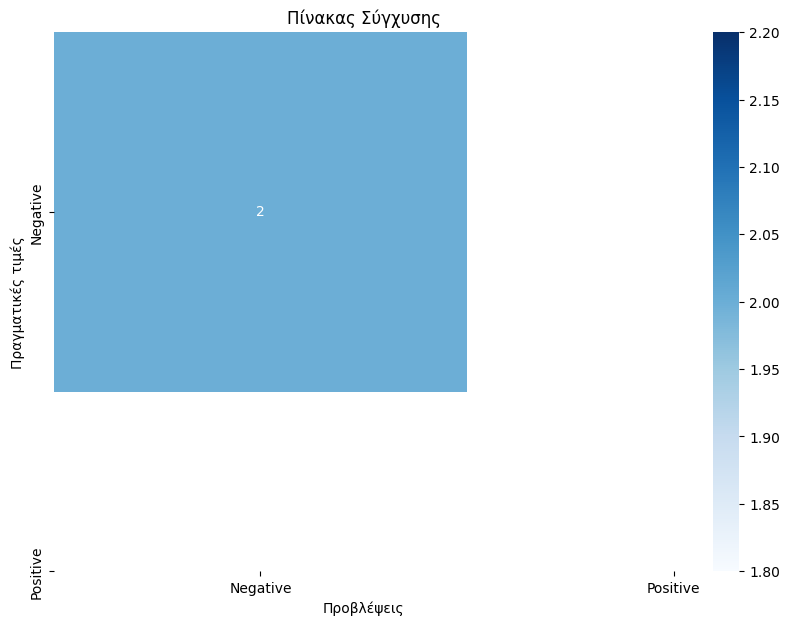

Ακρίβεια του μοντέλου: 1.00


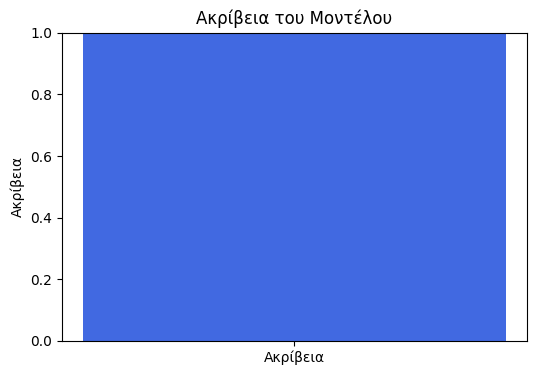


Αναφορά Ταξινόμησης:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Πίνακας Σύγχυσης
conf_matrix = confusion_matrix(y_test, y_pred)

# Δημιουργία διαγράμματος για τον πίνακα σύγχυσης
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Πίνακας Σύγχυσης')
plt.xlabel('Προβλέψεις')
plt.ylabel('Πραγματικές τιμές')
plt.show()

# 2. Ακρίβεια του μοντέλου
accuracy = accuracy_score(y_test, y_pred)
print(f"Ακρίβεια του μοντέλου: {accuracy:.2f}")

# Δημιουργία γραφήματος ακρίβειας
plt.figure(figsize=(6, 4))
plt.bar(["Ακρίβεια"], [accuracy], color='royalblue')
plt.ylim(0, 1)
plt.title('Ακρίβεια του Μοντέλου')
plt.ylabel('Ακρίβεια')
plt.show()

# 3. Κλασική Αναφορά
print("\nΑναφορά Ταξινόμησης:")
print(classification_report(y_test, y_pred))



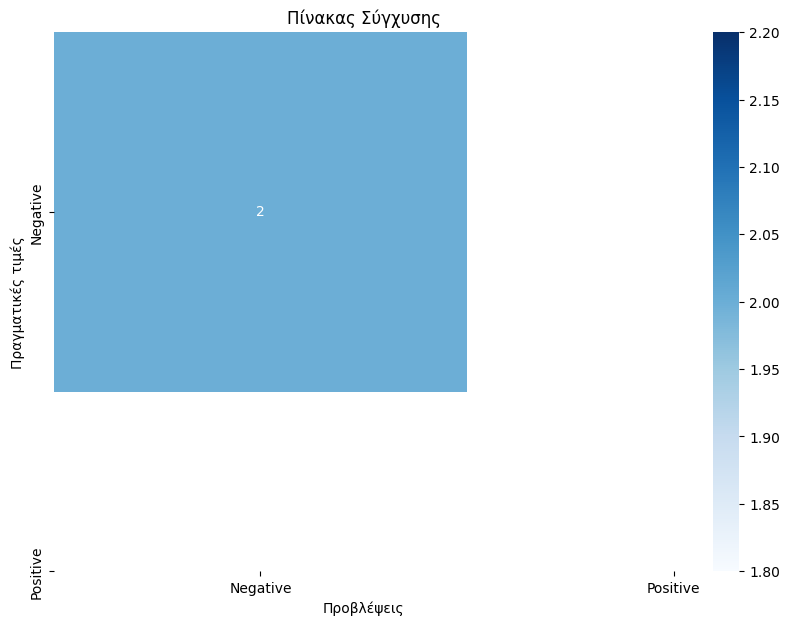

Ακρίβεια του μοντέλου: 1.00


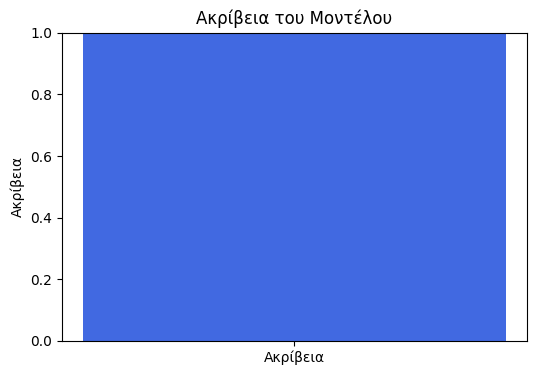

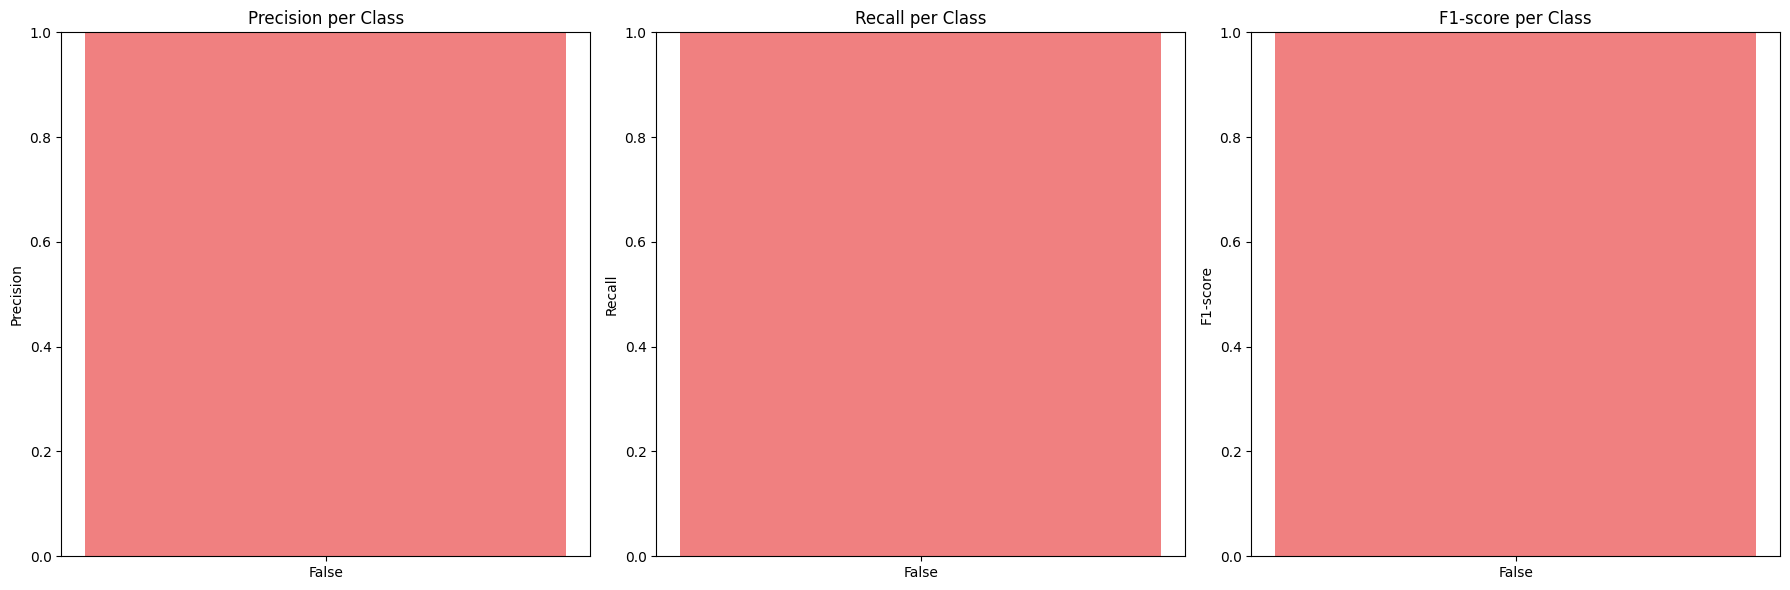

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 1. Πίνακας Σύγχυσης
conf_matrix = confusion_matrix(y_test, y_pred)

# Δημιουργία διαγράμματος για τον πίνακα σύγχυσης
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Πίνακας Σύγχυσης')
plt.xlabel('Προβλέψεις')
plt.ylabel('Πραγματικές τιμές')
plt.show()

# 2. Ακρίβεια του μοντέλου
accuracy = accuracy_score(y_test, y_pred)
print(f"Ακρίβεια του μοντέλου: {accuracy:.2f}")

# Δημιουργία γραφήματος ακρίβειας
plt.figure(figsize=(6, 4))
plt.bar(["Ακρίβεια"], [accuracy], color='royalblue')
plt.ylim(0, 1)
plt.title('Ακρίβεια του Μοντέλου')
plt.ylabel('Ακρίβεια')
plt.show()

# 3. Κλασική Αναφορά
report = classification_report(y_test, y_pred, output_dict=True)

# Εξαγωγή των κλάσεων και των metrics
classes = list(report.keys())[:-3]  # Αποφεύγουμε τα "accuracy", "macro avg", "weighted avg"
metrics = ['precision', 'recall', 'f1-score']

# Δημιουργία γραφήματος για precision, recall και f1-score
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    axes[i].bar(classes, [report[cls][metric] for cls in classes], color=['lightcoral', 'lightgreen'])
    axes[i].set_ylim(0, 1)
    axes[i].set_title(f'{metric.capitalize()} per Class')
    axes[i].set_ylabel(metric.capitalize())

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


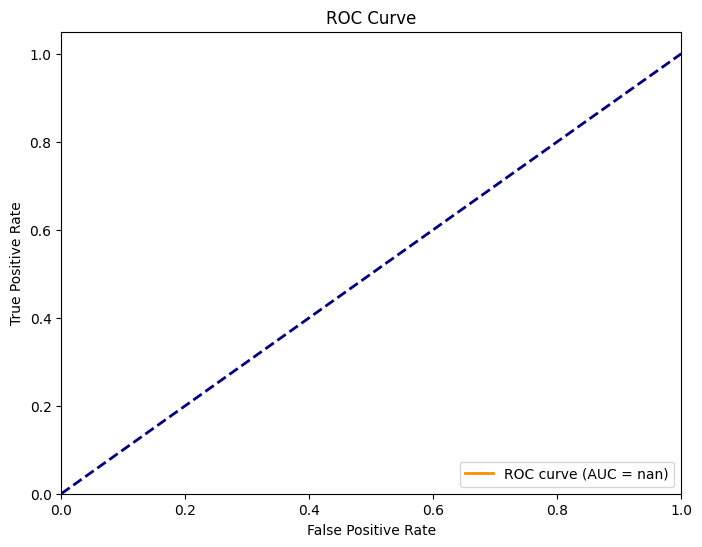

In [52]:
from sklearn.metrics import roc_curve, auc

# Υπολογισμός των πιθανοτήτων προβλέψεων (probabilities) για την κλάση
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Εδώ παίρνουμε τις πιθανότητες για την κλάση "Positive"

# Υπολογισμός του fpr, tpr και AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Δημιουργία γραφήματος ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


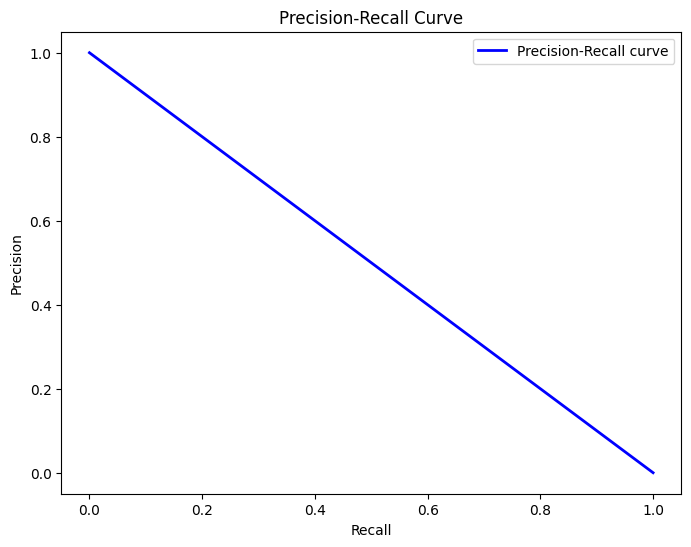

In [53]:
from sklearn.metrics import precision_recall_curve

# Υπολογισμός precision, recall και thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Δημιουργία γραφήματος Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:1690: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 4 instead of 5.
  warnings.warn(


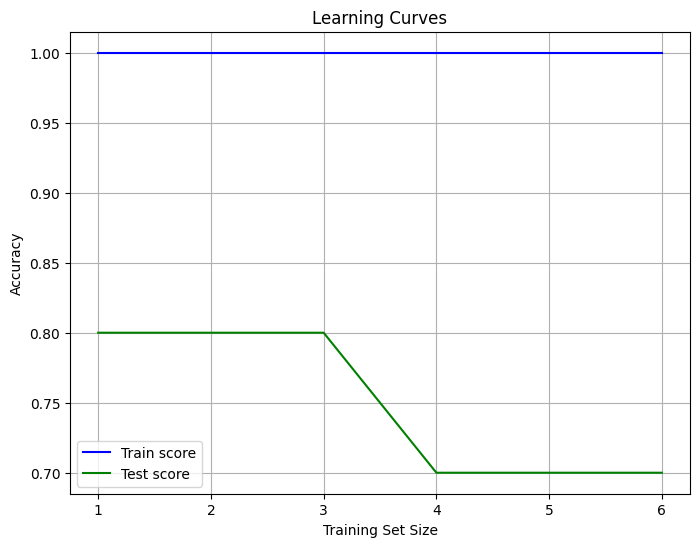

In [55]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier  # Παράδειγμα μοντέλου

# Ορισμός του μοντέλου (estimator)
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Υπολογισμός learning curves
train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=5)

# Υπολογισμός μέσου όρου για τα scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Γράφημα για τα learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Train score', color='blue')
plt.plot(train_sizes, test_mean, label='Test score', color='green')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


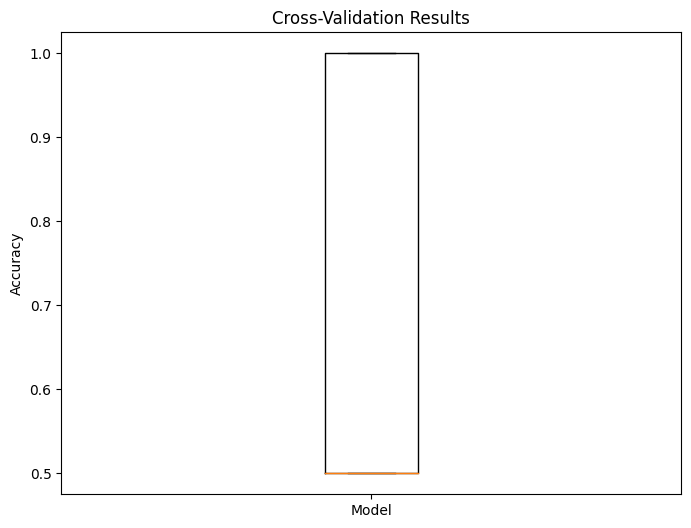

In [57]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Εκτέλεση cross-validation
cv_scores = cross_val_score(estimator, X_train, y_train, cv=5)

# Δημιουργία boxplot για τα αποτελέσματα
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores)
plt.title('Cross-Validation Results')
plt.ylabel('Accuracy')
plt.xticks([1], ['Model'])
plt.show()


In [59]:
from sklearn.model_selection import GridSearchCV

# Ρυθμίσεις υπερπαραμέτρων για τον ταξινομητή
param_grid = {'max_depth': [3, 5, 10], 'n_estimators': [50, 100, 200]}

# Εκτέλεση GridSearchCV
grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Εμφάνιση των καλύτερων παραμέτρων
print(f"Best Parameters: {grid_search.best_params_}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': 3, 'n_estimators': 50}


In [63]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Δημιουργία ονομάτων χαρακτηριστικών
feature_columns = [f'Feature_{i+1}' for i in range(X_train.shape[1])]

# Μετατροπή του X_train σε DataFrame με τα ονόματα χαρακτηριστικών
X_train_df = pd.DataFrame(X_train, columns=feature_columns)

# Εκπαίδευση του RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Λήψη της σημασίας των χαρακτηριστικών
feature_importance = model.feature_importances_

# Δημιουργία DataFrame για τις σημασίες των χαρακτηριστικών
importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': feature_importance})

# Ταξινόμηση ανά σημασία
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Εμφάνιση των 10 πιο σημαντικών χαρακτηριστικών
print(importance_df.head(10))


       Feature  Importance
2    Feature_3    0.090637
26  Feature_27    0.076226
48  Feature_49    0.076226
63  Feature_64    0.062672
58  Feature_59    0.059033
3    Feature_4    0.054610
19  Feature_20    0.049010
49  Feature_50    0.045586
41  Feature_42    0.044587
61  Feature_62    0.043695


In [67]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Υπολογισμός πίνακα σύγχυσης
conf_matrix = confusion_matrix(y_test, y_pred)

# Ελέγχουμε την διάσταση του πίνακα σύγχυσης
print("Shape of confusion matrix:", conf_matrix.shape)

# Εάν ο πίνακας σύγχυσης είναι 2x2, μπορούμε να προχωρήσουμε
if conf_matrix.shape == (2, 2):
    # Μετατροπή σε DataFrame για να απεικονιστεί πιο εύκολα
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

    # Δημιουργία heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
    plt.title('Πίνακας Σύγχυσης')
    plt.ylabel('Πραγματικές Τιμές')
    plt.xlabel('Προβλέψεις')
    plt.show()
else:
    print("Ο πίνακας σύγχυσης δεν είναι 2x2.")


Shape of confusion matrix: (1, 1)
Ο πίνακας σύγχυσης δεν είναι 2x2.


In [70]:
import numpy as np

# Εκτύπωση των μοναδικών τιμών στις y_test και y_pred
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))



Unique values in y_test: [False]
Unique values in y_pred: [False]


In [73]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced')

In [74]:
# Έλεγχος αν οι y_test ή y_pred περιέχουν μόνο μία κατηγορία
if len(set(y_test)) == 1 or len(set(y_pred)) == 1:
    print("y_test ή y_pred περιέχουν μόνο μία κατηγορία. Δεν μπορεί να γίνει πίνακας σύγχυσης.")
else:
    # Αν υπάρχει ποικιλία στις κατηγορίες, υπολογίζουμε τον πίνακα σύγχυσης
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.show()


y_test ή y_pred περιέχουν μόνο μία κατηγορία. Δεν μπορεί να γίνει πίνακας σύγχυσης.
